In [ ]:
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline   
import pandas as pd  

import tigramite
from tigramite import data_processing as pp
from tigramite.toymodels import structural_causal_processes as toys
from tigramite import plotting as tp
from tigramite.lpcmci import LPCMCI
from tigramite.pcmci import PCMCI
from tigramite.independence_tests.parcorr import ParCorr
from tigramite.independence_tests.regressionCI import RegressionCI
from tigramite.independence_tests.cmiknn import CMIknn
from casual_for_macro_utils import *

In [ ]:
dataframe, var_names, N = load_data("monetary-shock-dag.csv", plot=False)

bivariate lagged conditional independence test to estimate tau max

In [ ]:
# Create a (conditional) independence test object
# Here, the partial correlation test is used
def citest(name):
    test = None
    if name == "parcorr":
        test = ParCorr(significance='analytic')
    elif name == "regression":
        test = RegressionCI(significance='analytic')
    elif name == "cmiknn":
        test = CMIknn(significance='shuffle_test')
    else:
        print("No test found")
    return test
ci_test = citest("regression")

# Create a PCMCI object, passing the the dataframe and (conditional)
# independence test object.
pcmci = PCMCI(dataframe=dataframe, 
              cond_ind_test=ci_test,
              verbosity=1)

In [ ]:
# Run the `PCMCI.run_bivci` function
correlations = pcmci.run_bivci(tau_max=20, val_only=True)['val_matrix']

# Plot the results
setup_args = {'var_names':var_names,
              'figsize':(10, 6),
              'x_base':5,
              'y_base':.5}
lag_func_matrix = tp.plot_lagfuncs(val_matrix=correlations, 
                                   setup_args=setup_args)


##
## Running Tigramite BivCI algorithm
##

Parameters:

independence test = cmi_knn
tau_min = 0
tau_max = 20


In [ ]:
# Create a LPCMCI object, passing the dataframe and (conditional)
# independence test objects.
# parcorr = ParCorr(significance='analytic')
lpcmci = LPCMCI(dataframe=dataframe, 
                cond_ind_test=ci_test,
                verbosity=1)

# Define the analysis parameters.
tau_max = 3
pc_alpha = 0.01

# Run LPCMCI
results = lpcmci.run_lpcmci(tau_max=tau_max,
                            pc_alpha=pc_alpha)


Starting preliminary phase  1

Starting test phase

p = 0
(0,-3) independent (0, 0) given () union set()
(0,-2) independent (0, 0) given () union set()
Writing:   (0,-3) oL> (0, 0) ==> (0,-3)     (0, 0) 
Writing:   (0,-2) oL> (0, 0) ==> (0,-2)     (0, 0) 
(0, 0) independent (4, 0) given () union set()
(0, 0) independent (4, 0) given () union set()
(0, 0) independent (6, 0) given () union set()
(0, 0) independent (6, 0) given () union set()
(0, 0) independent (7, 0) given () union set()
(0, 0) independent (7, 0) given () union set()
(1, 0) independent (4, 0) given () union set()
(1, 0) independent (4, 0) given () union set()
(1, 0) independent (6, 0) given () union set()
(1, 0) independent (6, 0) given () union set()
(1, 0) independent (7, 0) given () union set()
(1, 0) independent (7, 0) given () union set()
(2, 0) independent (4, 0) given () union set()
(2, 0) independent (4, 0) given () union set()
(2, 0) independent (6, 0) given () union set()
(2, 0) independent (6, 0) given () uni

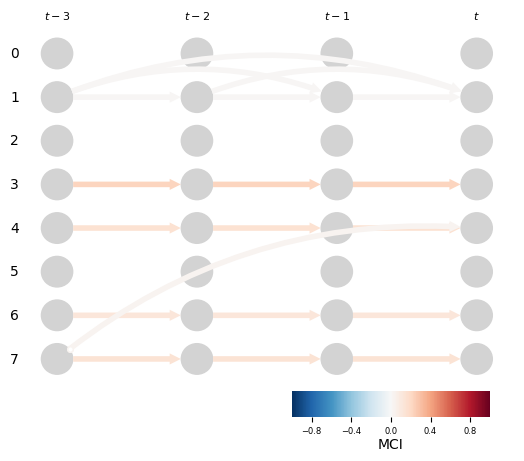

In [ ]:
# Plot the learned time series DPAG
tp.plot_time_series_graph(graph=results['graph'],
                          val_matrix=results['val_matrix'])
plt.show()

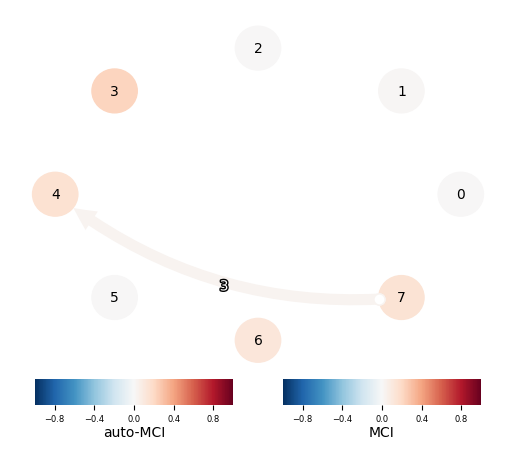

In [ ]:
# Plot the learned time series DPAG
tp.plot_graph(graph=results['graph'],
              val_matrix=results['val_matrix'])
plt.show()